<a href="https://colab.research.google.com/github/christedjo28/H8_36/blob/master/Sesi13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sesi 13**

Naive Bayes Classifier

In [1]:
# Assigning features and label variables

weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [2]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [3]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:
#Combinig weather and temp into single listof tuples

features=list(zip(weather_encoded,temp_encoded))

print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [5]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1]


In [6]:
# Example 2

#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [7]:
# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [8]:
# print data(feature)shape
wine.data.shape

(178, 13)

In [9]:
# print the wine data features (top 5 records)
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [10]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [11]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [12]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


### Decision Tree Classifier

In [14]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [15]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/diabetes.csv", header=None, names=col_names)

In [16]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [17]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB


In [18]:
numer = ['pregnant', 'insulin', 'bmi', 'skin','age','glucose','bp','pedigree', 'label']
for col in numer: # coerce for missing values
    pima[col] = pd.to_numeric(pima[col], errors='coerce')

In [19]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0


In [20]:
pima.dropna(inplace=True)

In [21]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [22]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi','skin', 'age','glucose','bp','pedigree']

X = pima[feature_cols] # Features
y = pima.label # Target variable

In [23]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


### Visualizing Decision Trees

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


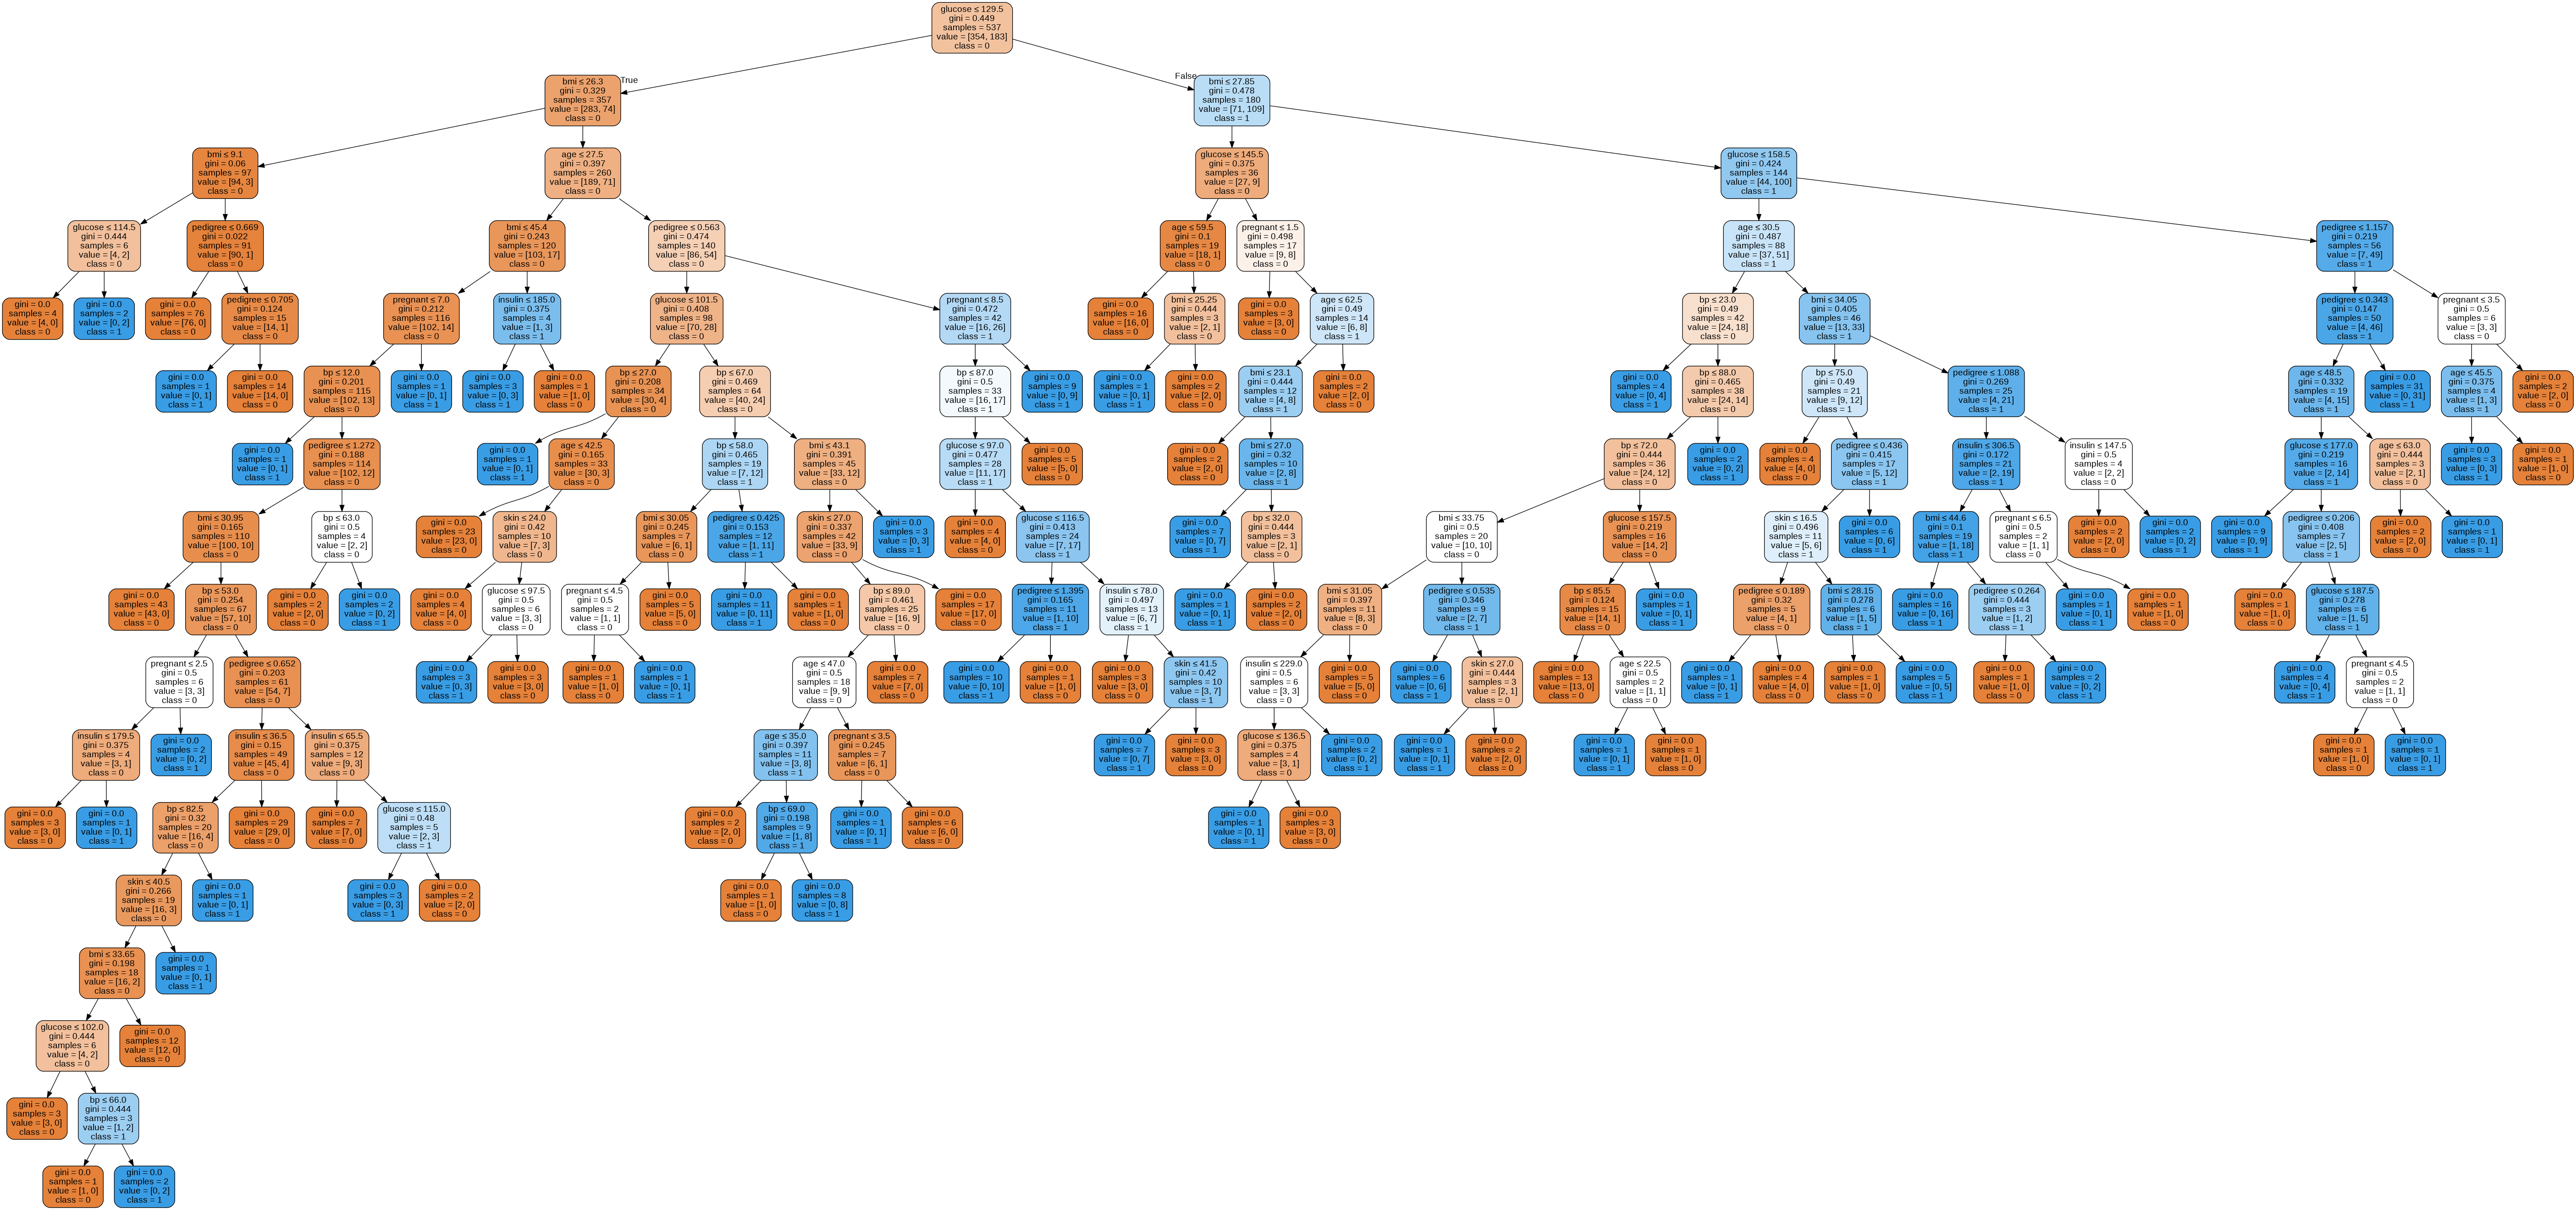

In [26]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(clf, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [27]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7748917748917749


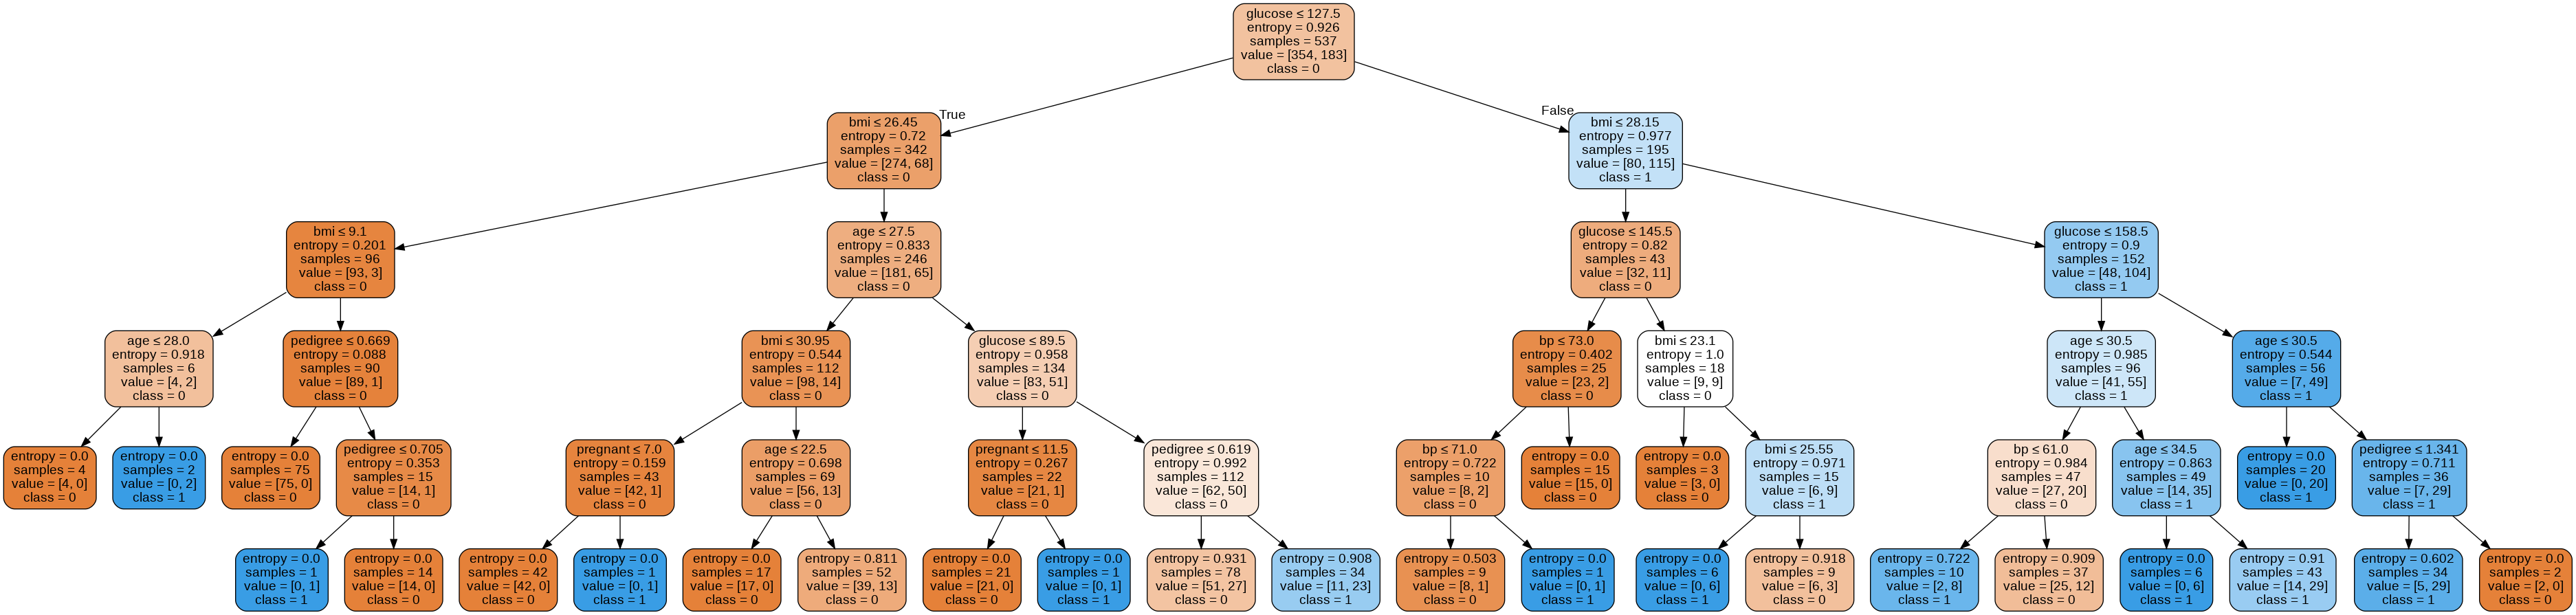

In [28]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(model, 
 out_file=dot_data, 
 class_names=['0','1'], # the target names.
 feature_names=feature_cols, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

### Random Forest

In [29]:
from sklearn import datasets
iris = datasets.load_iris()

In [30]:
print(iris.target_names)

print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [31]:
print(iris.data[0:5])

print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1) 

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
metrics.accuracy_score (y_test, y_pred)

0.9555555555555556

In [37]:
model.predict([[3,5,4,2]])

array([1])

### Support Vector Machine

In [38]:
from sklearn import datasets

cancer = datasets.load_breast_cancer()

In [39]:
print(cancer.target_names)
print(cancer.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [40]:
print(cancer.data[0:5])
print(cancer.target)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [41]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=1) 

In [42]:
from sklearn.svm import SVC

In [43]:
model = SVC(kernel='linear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [44]:
metrics.accuracy_score(y_test, y_pred)

0.9532163742690059


### Multiple Algorithm on Dataset

In [45]:
import pandas as pd
import numpy as np

In [46]:
train = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Final_Dataset/test.csv')

In [47]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
print("Train Data:")
print(train.isnull().sum(), "\n")
print("Test Data:")
print(test.isnull().sum())

Train Data:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 

Test Data:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [50]:
train.fillna(train.mean(),inplace=True) ## jadinya yang kosong diisi  dengan rata-ratanya
 

In [51]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
test.fillna(test.mean(),inplace=True) 
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [53]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True) 
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)  
train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True) 
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)  
test.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
train.Loan_Amount_Term=np.log(train.Loan_Amount_Term)

In [56]:
X=train.drop(['Loan_Status','Loan_ID'],1)
y=train.Loan_Status

In [57]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [58]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,5.886104,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,5.886104,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,5.886104,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,5.886104,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,5.886104,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [59]:
y.head()

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 20 to 563
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          491 non-null    int64  
 1   CoapplicantIncome        491 non-null    float64
 2   LoanAmount               491 non-null    float64
 3   Loan_Amount_Term         491 non-null    float64
 4   Credit_History           491 non-null    float64
 5   Gender_Female            491 non-null    uint8  
 6   Gender_Male              491 non-null    uint8  
 7   Married_No               491 non-null    uint8  
 8   Married_Yes              491 non-null    uint8  
 9   Dependents_0             491 non-null    uint8  
 10  Dependents_1             491 non-null    uint8  
 11  Dependents_2             491 non-null    uint8  
 12  Dependents_3+            491 non-null    uint8  
 13  Education_Graduate       491 non-null    uint8  
 14  Education_Not Graduate   

In [62]:
#(a)LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

pred_test=model.predict(x_test)

metrics.accuracy_score(y_test, pred_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8780487804878049

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test,pred_test))
matrix=confusion_matrix(y_test,pred_test)
print(matrix)

0.8780487804878049
[[18 13]
 [ 2 90]]


In [71]:
#(b)DECISION TREE ALGORITHM

from sklearn import tree

modeldt=tree.DecisionTreeClassifier(criterion='gini')

modeldt.fit(x_train,y_train)

pred_test=modeldt.predict(x_test)

metrics.accuracy_score(y_test, pred_test)


0.6991869918699187

In [65]:
pred_cv1=modeldt.predict(x_test)

In [72]:
#(c)RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier

modelrf=RandomForestClassifier()

modelrf.fit(x_train,y_train)

pred_test=modelrf.predict(x_test)

metrics.accuracy_score(y_test, pred_test)

0.8536585365853658

In [73]:
pred_cv2=modelrf.predict(x_test)

In [74]:
print(accuracy_score(y_test,pred_test))
matrix2=confusion_matrix(y_test,pred_test)
print(matrix2)

0.8536585365853658
[[19 12]
 [ 6 86]]


In [75]:
#(d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM

from sklearn import svm

modelsvm_model=svm.SVC()

modelsvm_model.fit(x_train,y_train)

pred_test=modelsvm_model.predict(x_test)

metrics.accuracy_score(y_test, pred_test)

0.7398373983739838

In [77]:
pred_cv3=modelsvm_model.predict(x_test)

In [80]:
#(e)NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB 

modelnb=GaussianNB()

modelnb.fit(x_train,y_train)

pred_test=modelnb.predict(x_test)

metrics.accuracy_score(y_test, pred_test)

pred_cv4=modelnb.predict(x_test)

print(accuracy_score(y_test,pred_cv4))
matrix4=confusion_matrix(y_test,pred_cv4)
print(matrix4)

0.8536585365853658
[[18 13]
 [ 5 87]]


In [82]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM

from sklearn.neighbors import KNeighborsClassifier

modelkNN=KNeighborsClassifier()

modelkNN.fit(x_train,y_train)

pred_test=modelkNN.predict(x_test)

metrics.accuracy_score(y_test, pred_test)

pred_cv4=modelkNN.predict(x_test)

pred_cv5=modelkNN.predict(x_test)

print(accuracy_score(y_test,pred_cv5))
matrix5=confusion_matrix(y_test,pred_cv5)
print(matrix5)

0.6341463414634146
[[ 6 25]
 [20 72]]


In [83]:
print("Logistic Regression:", accuracy_score(y_test,pred_test))
print("Decision Tree:", accuracy_score(y_test,pred_cv1))
print("Random Forest:", accuracy_score(y_test,pred_cv2))
print("SVM:", accuracy_score(y_test,pred_cv3))
print("Naive Bayes:", accuracy_score(y_test,pred_cv4))
print("KNN:", accuracy_score(y_test,pred_cv5))

Logistic Regression: 0.6341463414634146
Decision Tree: 0.7235772357723578
Random Forest: 0.8536585365853658
SVM: 0.7398373983739838
Naive Bayes: 0.6341463414634146
KNN: 0.6341463414634146


In [84]:
#Write test results in csv file

predictions=pd.DataFrame(pred_cv4, columns=['predictions']).to_csv('H8_NB_Credit_Predictions.csv')
